In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

from scipy import stats

import statsmodels.api as sm



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading the dataset
#source of dataset: 
#www.kaggle.com/c/house-prices-advanced-regression-techniques/data

data_frame=pd.read_csv("/content/drive/MyDrive/0projects/Digital Talent Scholarship/Digital Talent Scholarship 2021/Group Project/train.csv")

#backup dataframe
data_frame_backup=pd.DataFrame(data_frame)

In [3]:
data_frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [4]:
data_frame.shape

(1460, 81)

In [5]:
# changing column names to lowercase
data_frame.columns= data_frame.columns.str.strip().str.lower()

data_frame

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [6]:
data_frame.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [7]:
data_frame.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data_frame.isna().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
bsmtqual           37
bsmtcond           37
bsmtexposure       38
bsmtfintype1       37
bsmtfinsf1          0
bsmtfintype2       38
bsmtfinsf2          0
bsmtunfsf           0
totalbsmtsf         0
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [10]:
data_frame.alley

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30      Pave
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56      Pave
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [11]:
data_frame.columns[data_frame.isnull().any()]

Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence',
       'miscfeature'],
      dtype='object')

In [12]:

#counting missing values in percentage
misspercent=round(data_frame.isna().mean()*100,2).sort_values(ascending=False)
misspercent=misspercent[misspercent>0]
misspercent

poolqc          99.52
miscfeature     96.30
alley           93.77
fence           80.75
fireplacequ     47.26
lotfrontage     17.74
garagecond       5.55
garagetype       5.55
garageyrblt      5.55
garagefinish     5.55
garagequal       5.55
bsmtexposure     2.60
bsmtfintype2     2.60
bsmtfintype1     2.53
bsmtcond         2.53
bsmtqual         2.53
masvnrarea       0.55
masvnrtype       0.55
electrical       0.07
dtype: float64

In [13]:
#dropping columns which has more than 80% missing values
data_frame.drop(['poolqc', 'miscfeature', 'alley', 'fence'],axis=1, inplace=True)
data_frame.shape

(1460, 77)

In [14]:
# checking data type of each missing variables
data_frame[['lotfrontage', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagequal', 'garagecond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lotfrontage   1201 non-null   float64
 1   masvnrtype    1452 non-null   object 
 2   masvnrarea    1452 non-null   float64
 3   bsmtqual      1423 non-null   object 
 4   bsmtcond      1423 non-null   object 
 5   bsmtexposure  1422 non-null   object 
 6   bsmtfintype1  1423 non-null   object 
 7   bsmtfintype2  1422 non-null   object 
 8   electrical    1459 non-null   object 
 9   fireplacequ   770 non-null    object 
 10  garagetype    1379 non-null   object 
 11  garageyrblt   1379 non-null   float64
 12  garagefinish  1379 non-null   object 
 13  garagequal    1379 non-null   object 
 14  garagecond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [15]:
#imputing missing values to missing variables
misscat=data_frame[[ 'masvnrtype',  'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 
       'garagefinish', 'garagequal', 'garagecond']]
missnum=data_frame[['lotfrontage','garageyrblt','masvnrarea']]

#imputing mode for categorical variables
for col in misscat:
  data_frame[col].fillna(data_frame[col].mode()[0],inplace=True)

#imputing mean for numerical variables
for col in missnum:
  data_frame[col].fillna(data_frame[col].mean(),inplace=True)

In [16]:
data_frame.columns[data_frame.isnull().any()]

Index([], dtype='object')

<function matplotlib.pyplot.show>

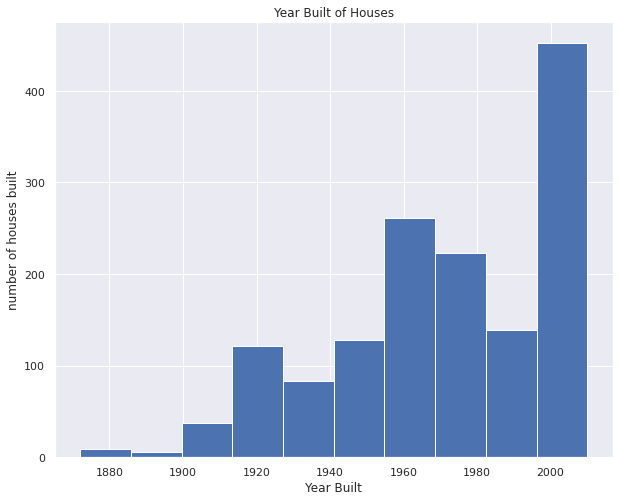

In [21]:
data_frame['yearbuilt'].plot(kind='hist',figsize=(10,8))

sns.set(font_scale = 1)
plt.title('Year Built of Houses')
plt.ylabel('number of houses built')
plt.xlabel('Year Built')
plt.show

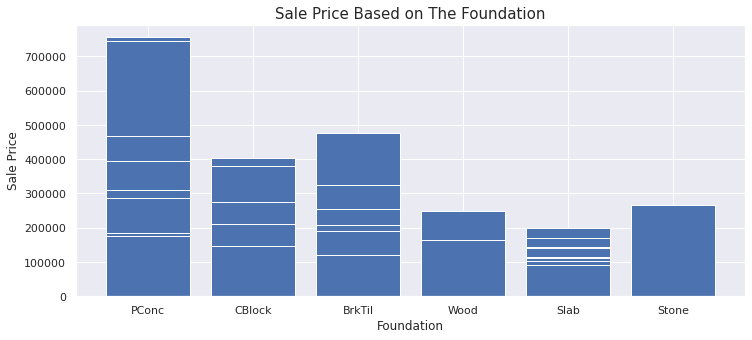


       Information :
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Concrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood



In [27]:
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(data_frame['foundation'], data_frame['saleprice'], data=data_frame)
ax.set_title('Sale Price Based on The Foundation', fontsize=15)
ax.set_ylabel('Sale Price')
ax.set_xlabel('Foundation')
plt.show()

print('''
       Information :
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Concrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
''')

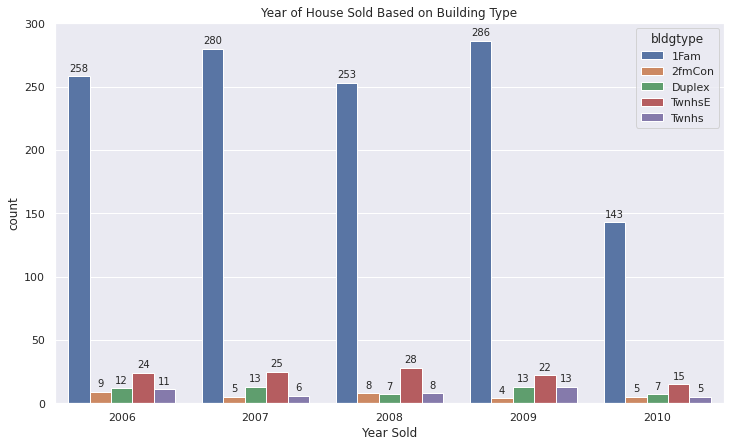


        Information :
        1Fam	Single-family Detached	
        2FmCon	Two-family Conversion; originally built as one-family dwelling
        Duplx	Duplex
        TwnhsE	Townhouse End Unit
        TwnhsI	Townhouse Inside Unit



In [26]:
# Defining the plot size
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Year of House Sold Based on Building Type')
# Defining the values for x-axis, hue-axis
# and from which datafarme the values are to be picked
plots = sns.countplot(hue = data_frame['bldgtype'], x = data_frame['yrsold'], data = data_frame)
plt.xlabel('Year Sold')

# Iterrating over the bars one-by-one
for bar in plots.patches:
     
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

print('''
        Information :
        1Fam	Single-family Detached	
        2FmCon	Two-family Conversion; originally built as one-family dwelling
        Duplx	Duplex
        TwnhsE	Townhouse End Unit
        TwnhsI	Townhouse Inside Unit
''')

In [28]:
krl = data_frame.corr()
krl

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
lotarea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
bsmtfinsf1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [29]:
# Sorting only positive correlation values towards Sale Price
krl = krl.saleprice[krl.saleprice >= 0]
krlp = pd.DataFrame(krl)

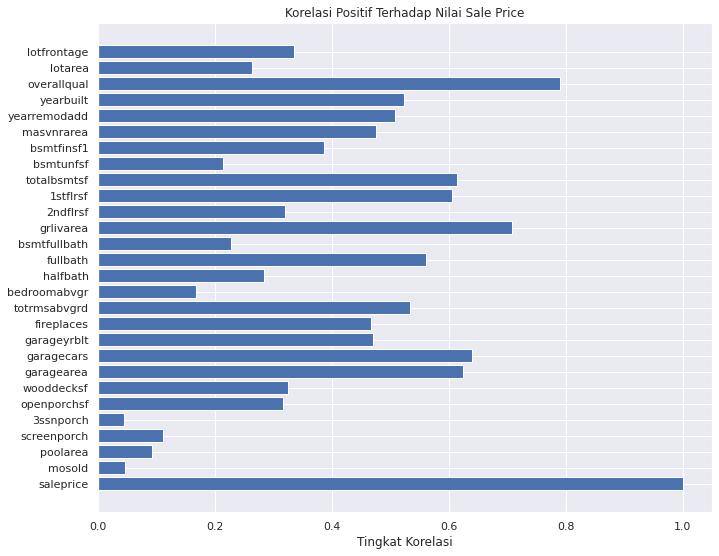

In [31]:
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(11,9))

ax.barh(krlp.index, width=krlp.saleprice)
ax.set_yticklabels(krlp.index)
ax.invert_yaxis()
ax.set_xlabel('Tingkat Korelasi')
ax.set_title('Korelasi Positif Terhadap Nilai Sale Price')

plt.show()

In [32]:
data1 = [i for i in data_frame.index]

data1 = data1[:50]
data2 = data_frame['mosold'].head(50)
data3 = data_frame['overallqual'].head(50)
data4 = data_frame['saleprice'].head(50)

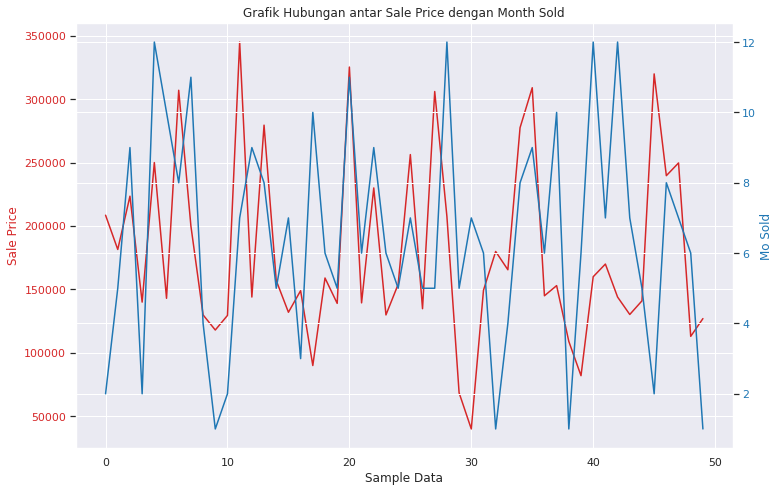

In [34]:
sns.set(font_scale = 1)
fig, ax1 = plt.subplots(figsize=(11,7))
ax1.set_title('Grafik Hubungan antar Sale Price dengan Month Sold')
color = 'tab:red'
ax1.set_xlabel('Sample Data')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(data1, data4, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mo Sold', color=color)
ax2.plot(data1, data2, color=color)
ax2.tick_params(axis='y',  labelcolor=color)

fig.tight_layout()

plt.show()

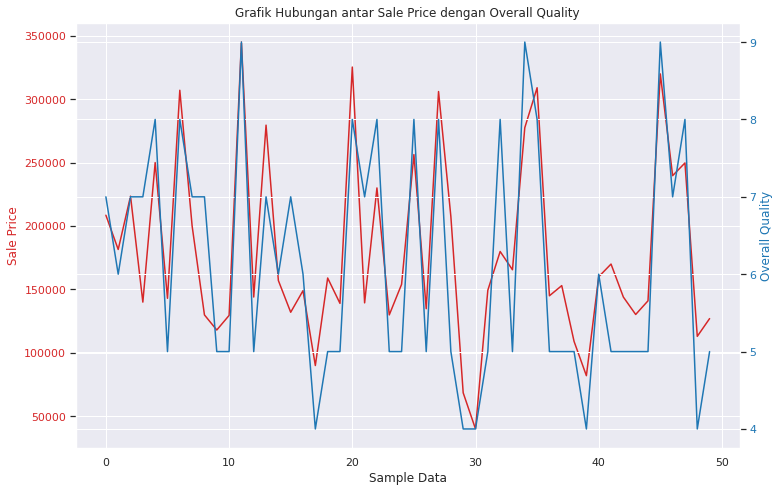

In [35]:
sns.set(font_scale = 1)
fig, bx1 = plt.subplots(figsize=(11,7))
bx1.set_title('Grafik Hubungan antar Sale Price dengan Overall Quality')
color = 'tab:red'
bx1.set_xlabel('Sample Data')
bx1.set_ylabel('Sale Price', color=color)
bx1.plot(data1, data4, color=color)
bx1.tick_params(axis='y', labelcolor=color)

bx2 = bx1.twinx()

color = 'tab:blue'
bx2.set_ylabel('Overall Quality', color=color)
bx2.plot(data1, data3, color=color)
bx2.tick_params(axis='y',  labelcolor=color)

fig.tight_layout()

plt.show()

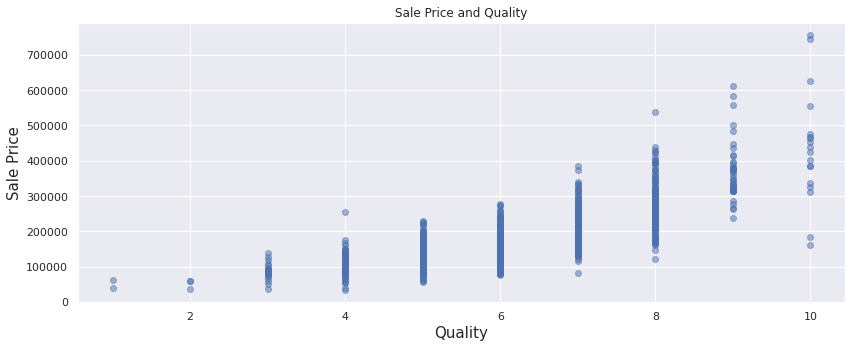


       10	Very Excellent      5	Average
       9	Excellent           4	Below Average
       8	Very Good           3	Fair
       7	Good                2	Poor
       6	Above Average       1	Very Poor


In [36]:
#overall quality = overall material and finish of the house
sns.set(font_scale = 1)
price_data = data_frame['saleprice']
quality = data_frame['overallqual']

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(quality, price_data, alpha=0.5)
ax.set_xlabel(r'Quality', fontsize=15)
ax.set_ylabel(r'Sale Price', fontsize=15)
ax.set_title('Sale Price and Quality')

ax.grid(True)
fig.tight_layout()

plt.show()

print('''
       10	Very Excellent      5	Average
       9	Excellent           4	Below Average
       8	Very Good           3	Fair
       7	Good                2	Poor
       6	Above Average       1	Very Poor''')
#Sebaran Harga dibandingkan dengan Kualitas rumah

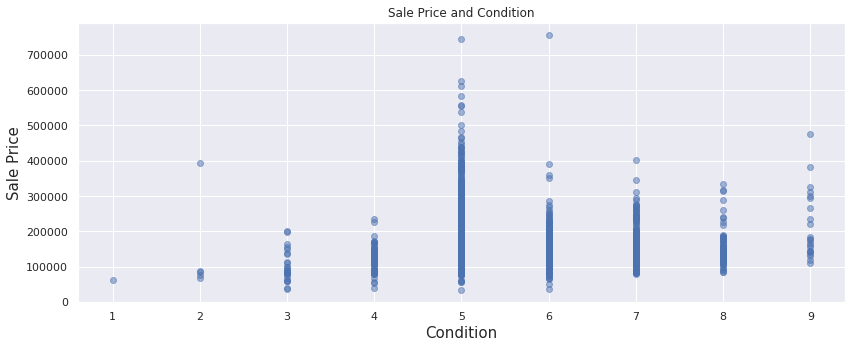


       10	Very Excellent      5	Average
       9	Excellent           4	Below Average
       8	Very Good           3	Fair
       7	Good                2	Poor
       6	Above Average       1	Very Poor


In [37]:
#overall condition of the house
sns.set(font_scale = 1)
price_data = data_frame['saleprice']
condition = data_frame['overallcond']

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(condition, price_data, alpha=0.5)
ax.set_xlabel(r'Condition', fontsize=15)
ax.set_ylabel(r'Sale Price', fontsize=15)
ax.set_title('Sale Price and Condition')

ax.grid(True)
fig.tight_layout()

plt.show()

print('''
       10	Very Excellent      5	Average
       9	Excellent           4	Below Average
       8	Very Good           3	Fair
       7	Good                2	Poor
       6	Above Average       1	Very Poor''')   
                         
#Sebaran Harga dibandingkan dengan Kondisi rumah

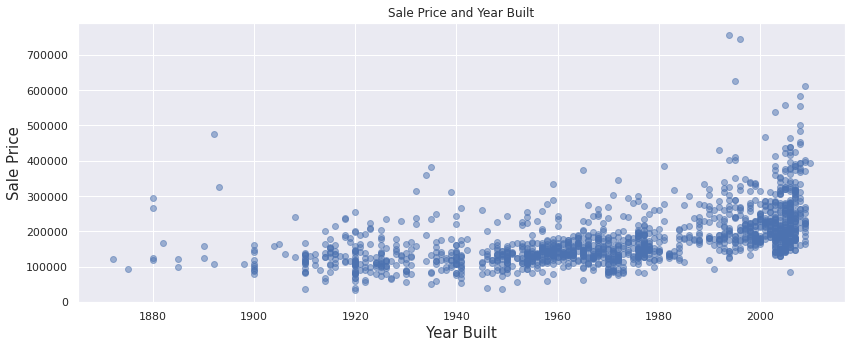

In [38]:
sns.set(font_scale = 1)
price_data = data_frame['saleprice']
year_built = data_frame['yearbuilt']

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(year_built, price_data, alpha=0.5)
ax.set_xlabel(r'Year Built', fontsize=15)
ax.set_ylabel(r'Sale Price', fontsize=15)
ax.set_title('Sale Price and Year Built')

ax.grid(True)
fig.tight_layout()

plt.show()

#Sebaran data tahun berdiri rumah dan harga rumah

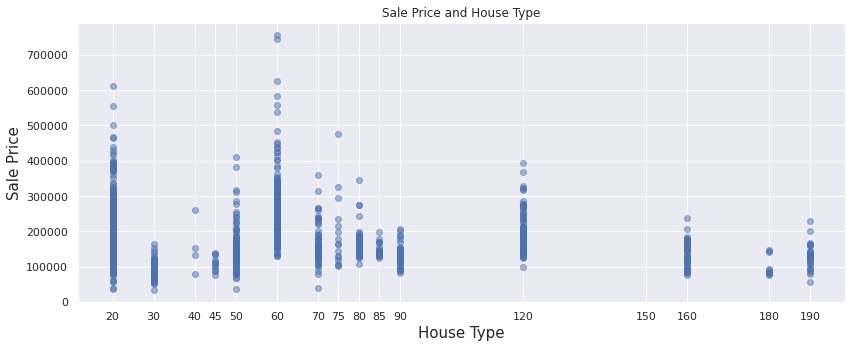


       type 20	: 1-STORY 1946 & NEWER ALL STYLES       type 85	  : SPLIT FOYER
       type 30	: 1-STORY 1945 & OLDER                  type 90	  : DUPLEX - ALL STYLES AND AGES
       type 40	: 1-STORY W/FINISHED ATTIC ALL AGES     type 120  : 1-STORY PUD (Planned Unit Development)
       type 45	: 1-1/2 STORY - UNFINISHED ALL AGES                - 1946 & NEWER
       type 50	: 1-1/2 STORY FINISHED ALL AGES         type 150  : 1-1/2 STORY PUD - ALL AGES
       type 60	: 2-STORY 1946 & NEWER                  type 160  : 2-STORY PUD - 1946 & NEWER
       type 70	: 2-STORY 1945 & OLDER                  type 180  : PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       type 75	: 2-1/2 STORY ALL AGES                  type 190  : 2 FAMILY CONVERSION - ALL STYLES AND AGES
       type 80	  : SPLIT OR MULTI-LEVEL


In [39]:
sns.set(font_scale = 1)
price_data = data_frame['saleprice']
subclasshouse = data_frame['mssubclass']

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(subclasshouse, price_data, alpha=0.5)
ax.set_xlabel(r'House Type', fontsize=15)
ax.set_ylabel(r'Sale Price', fontsize=15)
ax.set_title('Sale Price and House Type')
ax.set_xticks([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190])

ax.grid(True)
fig.tight_layout()

plt.show()

#Sebaran data type rumah dari MSSubCLass dan harganya
#MSSubClass: Identifies the type of dwelling involved in the sale.	
print('''
       type 20	: 1-STORY 1946 & NEWER ALL STYLES       type 85	  : SPLIT FOYER
       type 30	: 1-STORY 1945 & OLDER                  type 90	  : DUPLEX - ALL STYLES AND AGES
       type 40	: 1-STORY W/FINISHED ATTIC ALL AGES     type 120  : 1-STORY PUD (Planned Unit Development)
       type 45	: 1-1/2 STORY - UNFINISHED ALL AGES                - 1946 & NEWER
       type 50	: 1-1/2 STORY FINISHED ALL AGES         type 150  : 1-1/2 STORY PUD - ALL AGES
       type 60	: 2-STORY 1946 & NEWER                  type 160  : 2-STORY PUD - 1946 & NEWER
       type 70	: 2-STORY 1945 & OLDER                  type 180  : PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       type 75	: 2-1/2 STORY ALL AGES                  type 190  : 2 FAMILY CONVERSION - ALL STYLES AND AGES
       type 80	  : SPLIT OR MULTI-LEVEL''')      

In [40]:
data_frame.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
lotarea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
bsmtfinsf1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [41]:
plt.figure(figsize=(100,80))
sns.set(font_scale = 3)
sns.heatmap(data_frame.corr(),annot=True,annot_kws={'size': 30})

Output hidden; open in https://colab.research.google.com to view.

In [43]:
# There are 2 types of categorical variable in our dataset: ordinal and nominal.
# Selecting ordinal variables.
ordinal_var = data_frame[['exterqual', 'extercond', 'bsmtqual', 'bsmtcond', 'heatingqc', 'kitchenqual',
                    'fireplacequ', 'garagequal', 'garagecond']]

ordinal_var.head()

,exterqual,extercond,bsmtqual,bsmtcond,heatingqc,kitchenqual,fireplacequ,garagequal,garagecond
0,Gd,TA,Gd,TA,Ex,Gd,Gd,TA,TA
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA


In [44]:
!pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders


  Cloning https://github.com/scikit-learn-contrib/category_encoders to /tmp/pip-req-build-abdp7tbq
  Running command git clone -q https://github.com/scikit-learn-contrib/category_encoders /tmp/pip-req-build-abdp7tbq
  Created wheel for category-encoders: filename=category_encoders-2.2.2-py2.py3-none-any.whl size=39406985 sha256=8924ccafb2cd089056b636595a581bedb33dd837973f665e605da3aabe850f2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6d6fdb8h/wheels/38/e2/0c/8eaac5266f4f51e0a93d00bdb8e04292387b6c50e71232bffd
Successfully built category-encoders


In [45]:
import category_encoders as ce

#Encoding ordinal variables
for col in ordinal_var:
    qual_map = [
        {'col' : col,
         'mapping' : {
             'Ex' : 4,
             'Gd' : 3,
             'TA' : 2,
             'Fa' : 1,
             'Po' : 0,
         }}
    ]
    
    enc = ce.OrdinalEncoder(mapping = qual_map, return_df = True)
    data_frame[col] = enc.fit_transform(data_frame[col])

In [46]:

# Checking encoded ordinal variables
data_frame[['exterqual', 'extercond', 'bsmtqual', 'bsmtcond', 'heatingqc', 'kitchenqual', 
      'fireplacequ','garagequal', 'garagecond']].head()

,exterqual,extercond,bsmtqual,bsmtcond,heatingqc,kitchenqual,fireplacequ,garagequal,garagecond
0,3,2,3,2,4,3,3,2,2
1,2,2,3,2,4,2,2,2,2
2,3,2,3,2,4,3,2,2,2
3,2,2,2,3,3,3,3,2,2
4,3,2,3,2,4,3,2,2,2


In [47]:
# Selecting nominal variables
nominal_var = data_frame.select_dtypes(include = ['object'])
nominal_var.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,foundation,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,centralair,electrical,functional,garagetype,garagefinish,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [48]:
le = LabelEncoder()

for col in nominal_var:
    data_frame[col] = le.fit_transform(data_frame[col])

In [49]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   int64  
 3   lotfrontage    1460 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   int64  
 6   lotshape       1460 non-null   int64  
 7   landcontour    1460 non-null   int64  
 8   utilities      1460 non-null   int64  
 9   lotconfig      1460 non-null   int64  
 10  landslope      1460 non-null   int64  
 11  neighborhood   1460 non-null   int64  
 12  condition1     1460 non-null   int64  
 13  condition2     1460 non-null   int64  
 14  bldgtype       1460 non-null   int64  
 15  housestyle     1460 non-null   int64  
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

In [50]:
data_frame.corr()['saleprice'].abs().sort_values(ascending = False).head(12)

saleprice       1.000000
overallqual     0.790982
grlivarea       0.708624
exterqual       0.682639
kitchenqual     0.659600
bsmtqual        0.650138
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
1stflrsf        0.605852
fullbath        0.560664
garagefinish    0.537242
Name: saleprice, dtype: float64

In [51]:
y = data_frame['saleprice']

x = data_frame.drop(['saleprice'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [52]:
# Train the model
lr = LinearRegression()

lr.fit(x_train, y_train)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 2817559.1658636504
Coefficients: 
 [-1.14307404e+00 -1.38205923e+02  2.06565644e+02 -1.53192878e+02
  3.11713770e-01  1.23423182e+04 -7.26517091e+02  2.07005373e+03
  3.65704755e-09  3.89708349e+02  6.69845692e+03  5.01267280e+02
 -6.78700707e+02 -1.15127356e+04 -3.32135325e+03 -1.11181625e+03
  1.12799287e+04  3.86980574e+03  8.91390163e+01  7.45642874e+01
  2.15350422e+03  5.77336504e+03 -1.98154406e+03  1.04359773e+03
  3.28510272e+03  4.61194041e+01  1.42164330e+04 -2.59586064e+03
  2.40822635e+03  1.09554924e+04 -2.72681842e+03 -3.74673092e+03
 -1.81132806e+03 -3.39473164e+00  2.06921483e+03  1.08247971e+01
 -2.12623772e+00  5.30382773e+00 -2.54975053e+03  3.03026981e+02
 -2.46110779e+03 -9.90917287e+02  8.67740477e+00  6.47975759e+00
  1.61650833e+01  3.13222456e+01  1.00456409e+04  5.41148655e+03
  6.56449579e+03  2.35954508e+03 -3.43634769e+03 -7.93361184e+03
  6.51223931e+03  3.45853845e+03  2.89018198e+03  9.08843168e+03
  6.60851150e+03  2.22681172e+02  1.771565

In [56]:
# Train score
lr.score(x_train, y_train)

0.8506989411795043

In [57]:
x1 = sm.add_constant(x_train)
est = sm.OLS(y_train, x1).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     73.99
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:18:49   Log-Likelihood:                -12002.
No. Observations:                1022   AIC:                         2.415e+04
Df Residuals:                     948   BIC:                         2.452e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.818e+06    1.6e+06      1.763